In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from matplotlib import cm
from pprint import pprint

import statsmodels.api as sm
import seaborn as sns
import feature_processing as fp

from sklearn.cluster import FeatureAgglomeration

%matplotlib inline

/home/ryohayama/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
if True:
    from imblearn.under_sampling import TomekLinks, RandomUnderSampler
    from imblearn.over_sampling import SMOTE, ADASYN

In [9]:
if True:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, roc_curve, precision_recall_curve
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.feature_selection import RFECV

In [4]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

def my_gini(y_true, y_probas):
    auc = roc_auc_score(y_true, y_probas[:, 1])
    gini = 2*auc - 1
    return gini

gini_scorer = make_scorer(my_gini, needs_proba=True, greater_is_better=True)

# Import data

In [5]:
data = pd.read_csv('./data/trainset_digitized.csv')
feature_space = pd.read_csv('./data/F001.csv')
target = data.iloc[:, -1]

In [6]:
X = np.array(feature_space)
y = np.array(target)

print('X:', X.shape)
print('y:', y.shape)

X: (595212, 127)
y: (595212,)


In [7]:
rstate = None
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rstate)

num_class1 = np.sum(y)
num_class1_to_resample = 2 * num_class1
num_class0_to_resample = int(1 * num_class1_to_resample)

# First, randomly undersample the majority
rus = RandomUnderSampler(ratio={0: num_class0_to_resample , 1: num_class1})
X_tlrus, y_tlrus = rus.fit_sample(X, y)

# Then use SMOTE to oversample the minority
smote = SMOTE(ratio={0: num_class0_to_resample , 1: num_class1_to_resample}, n_jobs=4)
X_res, y_res = smote.fit_sample(X_tlrus, y_tlrus)

In [10]:
%%time
xgb = XGBClassifier(gamma=1, max_depth=8, colsample_bytree=0.5, n_estimators=200, n_jobs=8)
selector = RFECV(xgb, step=1, cv=3, scoring=gini_scorer, verbose=3)
selector = selector.fit(X_res, y_res)

Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
F

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 feature

In [20]:
RFE_result = pd.DataFrame({'support': selector.support_, 
                           'ranking': selector.ranking_, 
                           'grid_score': selector.grid_scores_}, 
                           index=feature_space.columns,
                           columns=['support', 'ranking', 'grid_score'])

In [24]:
RFE_result#.head(10)

,support,ranking,grid_score
ps_ind_06_bin,True,1,0.452055
ps_ind_07_bin,True,1,0.492270
ps_ind_08_bin,True,1,0.548439
ps_ind_09_bin,True,1,0.579802
ps_ind_12_bin,True,1,0.593350
ps_ind_16_bin,True,1,0.589432
ps_ind_17_bin,True,1,0.593705
ps_ind_18_bin,True,1,0.593166
ps_car_01_cat_NaN,False,19,0.595455
ps_car_01_cat_0,True,1,0.594554


In [23]:
RFE_result.to_csv('./data/RFE_result.csv', index=False)

In [31]:
RFE_features_list = list(RFE_result[RFE_result.ranking == 1].index)
rfe_features = feature_space[RFE_features_list]

In [33]:
rfe_features.to_csv('./data/rfe_features.csv', index=False)

# Try XGBoost on RFEed feature space

In [26]:
X_rfe = selector.transform(X)
Xs = [X, X_rfe]

labels = ['Before RFE', 'After RFE']

Before RFE Gini=0.269+/-0.009, Best=0.293
After RFE Gini=0.269+/-0.011, Best=0.288
CPU times: user 1h 6min 40s, sys: 13.2 s, total: 1h 6min 54s
Wall time: 9min 29s


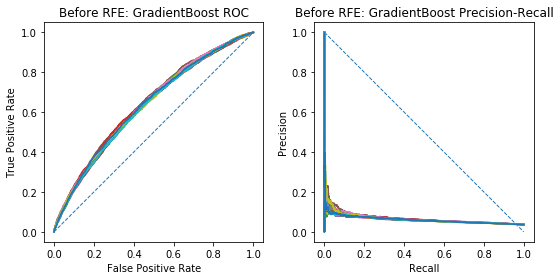

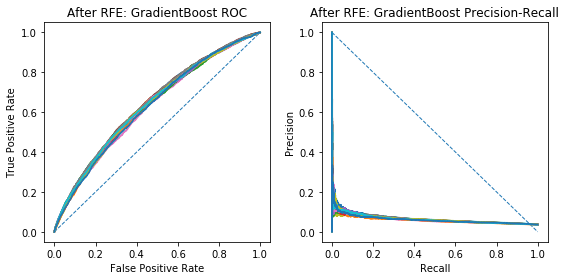

In [28]:
%%time

for j, X in enumerate(Xs):
    label = labels[j]

    fig = plt.figure(figsize=(8, 4))
    ax21 = fig.add_subplot(1, 2, 1)
    ax22 = fig.add_subplot(1, 2, 2)

    neutral_line = np.linspace(0, 1, 10)
    ax21.plot(neutral_line, neutral_line, lw=1, ls='--')
    ax22.plot(neutral_line, 1- neutral_line, lw=1, ls='--')

    ginis_xgb = []

    for i in range(20):

        rstate = None
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rstate)

        num_class1 = np.sum(y_train)
        num_class1_to_resample = 2 * num_class1
        num_class0_to_resample = int(1 * num_class1_to_resample)

        # First, randomly undersample the majority
        rus = RandomUnderSampler(ratio={0: num_class0_to_resample , 1: num_class1})
        X_tlrus, y_tlrus = rus.fit_sample(X_train, y_train)

        # Then use SMOTE to oversample the minority
        smote = SMOTE(ratio={0: num_class0_to_resample , 1: num_class1_to_resample}, n_jobs=8)
        X_res, y_res = smote.fit_sample(X_tlrus, y_tlrus)

        # GradientBoost
        clf = XGBClassifier(gamma=1, max_depth=8, colsample_bytree=0.5, n_estimators=200, n_jobs=8)
        clf.fit(X_res, y_res)

        y_pred2 = clf.predict(X_test)
        y_proba2 = clf.predict_proba(X_test)
        ginis_xgb.append(my_gini(y_test, y_proba2))
        report2 = classification_report(y_test, y_pred2, digits=4,
                                       labels=None, target_names=None)

        precision2, recall2, _ = precision_recall_curve(y_test, y_proba2[:, 1], pos_label=1)
        fpr2, tpr2, _ = roc_curve(y_test, y_proba2[:, 1], pos_label=1)
        ax21.plot(fpr2, tpr2)
        ax21.set_xlabel('False Positive Rate')
        ax21.set_ylabel('True Positive Rate')
        ax21.set_title('%s: GradientBoost ROC' % label)
        ax22.plot(recall2, precision2)
        ax22.set_xlabel('Recall')
        ax22.set_ylabel('Precision')
        ax22.set_title('%s: GradientBoost Precision-Recall' % label)

    plt.tight_layout()

    print('%s Gini=%.3f+/-%.3f, Best=%.3f' % (label, np.mean(ginis_xgb), np.std(ginis_xgb), np.max(ginis_xgb)))

plt.tight_layout()